In [ ]:
# This is Luke's scratchpad notebook.

In [1]:
# Importing the libraries:
import pandas as pd
import numpy as np
import math
from scipy import stats

# visualizing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plt.rc('figure', figsize=(13, 10))
# plt.rc('font', size=14)

# preparing
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modeling and evaluating
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix

# turn off warnings
import warnings
warnings.filterwarnings("ignore")

# acquiring
from pydataset import data

### Data Prep

In [4]:
from scripts_python import wrangle
from scripts_python import explore
from scripts_python import model_MAE, model_classification

In [3]:
# import acquire
# import prepare
# import wrangle
# import model_MAE

# Moving into Explore

- Where are the clusters of cases visually?
- Where are the most dense clusters?
- How to define dense vs not dense?
- What are some other visually interesting things?
    - Scatterplot of all cases?
    - mapplot of svi by census tract?

In [11]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 25) (73, 25)


### Cross Validation

In [12]:
# loocv to manually evaluate the performance of a random forest classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from numpy import mean, std, absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [13]:

# create dataset
X, y = make_blobs(n_samples=100, random_state=1)
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# fit model
	model = RandomForestClassifier(random_state=1)
	model.fit(X_train, y_train)
	# evaluate model
	yhat = model.predict(X_test)
	# store
	y_true.append(y_test[0])
	y_pred.append(yhat[0])
# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.990


In [14]:
# loocv to automatically evaluate the performance of a random forest classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# create dataset
X, y = make_blobs(n_samples=100, random_state=1)
# create loocv procedure
cv = LeaveOneOut()
# create model
model = RandomForestClassifier(random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.990 (0.099)


In [15]:
# Sonar Example:

# summarize the sonar dataset
from pandas import read_csv
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
sonar_df = read_csv(url, header=None)
# split into input and output elements
data = sonar_df.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(208, 60) (208,)


In [16]:
y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [17]:
# create loocv procedure
cv = LeaveOneOut()

In [18]:
# create model
model = RandomForestClassifier(random_state=1)

In [19]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.822 (0.382)


#### Housing data example:

In [20]:
# loocv evaluate random forest on the housing dataset
from numpy import mean, std, absolute
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
# split into inputs and outputs
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)
# create loocv procedure
cv = LeaveOneOut()
# create model
model = RandomForestRegressor(random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force positive
scores = absolute(scores)
# report performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

(506, 13) (506,)
MAE: 2.182 (2.338)


In [21]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


### Adjusting the modeling vizzes

In [5]:
# data acquire and prep
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 40) (73, 40)


In [6]:
df

,tract,e_pov,ep_pov,spl_theme1,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,...,delta,avg3yr,r_soci_rise,r_comp_rise,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall
0,48029110100,513,20.8,1.8960,0.6503,0,0,0,0,0,...,0.0763,0.710733,1,0,1,0,0,1,0,0
1,48029110300,1057,35.1,2.9638,0.6978,1,1,0,0,2,...,0.0462,0.754767,0,1,0,0,0,0,0,1
2,48029110500,1623,68.0,3.9778,0.9770,1,1,1,1,4,...,0.0367,0.968700,0,0,1,1,0,1,0,0
3,48029110600,1441,51.1,3.8270,0.9841,1,1,1,1,4,...,0.0263,0.982533,0,0,0,1,1,0,0,0
4,48029110700,376,33.8,3.4805,0.9378,0,0,1,0,1,...,0.0255,0.945667,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,48029192100,118,5.7,0.9579,0.3829,0,0,0,0,0,...,0.0130,0.418033,0,0,1,0,1,0,0,0
358,48029192200,496,21.4,2.2141,0.6125,0,0,0,0,0,...,0.0440,0.677867,0,0,0,0,0,1,0,0
359,48029192300,399,8.0,0.7303,0.1911,0,0,0,0,0,...,0.0863,0.152333,0,0,0,1,0,0,0,0
360,48029980003,77,10.9,1.9445,0.1477,0,0,0,0,0,...,0.1840,0.118400,1,1,0,0,0,0,0,0


In [9]:
# What is the mean vs median of the target variable?
y_train.tract_cases_per_100k.mean(), y_train.tract_cases_per_100k.median()

(3201.968351790576, 2903.7827641596423)

In [10]:
# calculate the mean absolute error (MAE) of the baseline using mean
mean_baseMAE, basepred1 = model_MAE.get_baseline_mean(y_train)

Baseline MAE: 973.0351509141836


In [11]:
X_train_scaled.r_status_fall.value_counts()

0    287
1      2
Name: r_status_fall, dtype: int64

In [12]:
X_train_scaled.r_status_rise.value_counts()

1    151
0    138
Name: r_status_rise, dtype: int64

In [13]:
rankdf = model_MAE.feature_ranking(X_train_scaled, y_train)
rankdf

,features
rank,
1,spl_theme1_scaled
2,r_status_fall
3,delta
4,avg3yr
5,rank_svi_scaled
6,f_soci_total_scaled
7,f_pov_soci
8,ep_pov_scaled
9,raw_svi


In [14]:
# only raw svi score
X_raw_svi = X_train_scaled[['raw_svi']]
# binned svi score by CDC range category = 1st ranked
X_rank_svi_only = X_train_scaled[['rank_svi_scaled']]
# top 4 ranked features
X_top4 = X_train_scaled[['spl_theme1_scaled', 'r_status_fall', 'delta', 'avg3yr']]
# only the summary of the flags = 19th ranked
X_all_flags_only = X_train_scaled[['all_flags_total_scaled']]
# only summary flags, should be the same as all flags total? = 5th, 12th, 15th, 21st
X_summary_flags = X_train_scaled[['f_comp_total_scaled', 'f_soci_total_scaled', 'f_status_total_scaled', 'f_trans_total_scaled']]
# all individual flags
X_not_summary_flags = X_train_scaled[['f_nohsdp_soci', 'f_minrty_status', 'f_groupq_trans', 'f_unemp_soci', 
                                     'f_disabl_comp', 'f_noveh_trans', 'f_mobile_trans', 'f_age65_comp', 
                                     'f_age17_comp', 'f_pov_soci', 'f_limeng_status', 'f_crowd_trans', 
                                      'f_pci_soci', 'f_sngpnt_comp', 'f_munit_trans']]
# top 10 by RFE
X_top10 = X_train_scaled[['spl_theme1_scaled', 'r_status_fall', 'delta', 'avg3yr', 'rank_svi_scaled', 
                          'f_soci_total_scaled', 'f_pov_soci', 'ep_pov_scaled', 'raw_svi', 'f_age17_comp']]
# engineered features only
X_svifeatures = X_train_scaled[['rising', 'falling', 'delta', 'avg3yr', 'r_soci_rise', 'r_comp_rise', 
                                'r_status_rise', 'r_trans_rise', 'r_soci_fall', 'r_comp_fall', 'r_status_fall', 'r_trans_fall']]
X_Rlist = X_train_scaled[['rank_svi_scaled', 'rising', 'falling', 'delta', 'avg3yr']]

In [15]:
# create variables for loop
df2test = [X_rank_svi_only, X_top4, X_all_flags_only, X_summary_flags, X_not_summary_flags, X_train_scaled, 
           X_raw_svi, X_top10, X_svifeatures, X_Rlist]
target = y_train

In [16]:
# Linear Regression Models
cvlm_MAE_list = []
for df in df2test:
    cvlm_MAE = model_MAE.cvLinearReg(df, target) 
    cvlm_MAE_list.append(cvlm_MAE)

MAE: 781.251 (723.733)
MAE: 738.457 (730.534)
MAE: 872.290 (741.162)
MAE: 848.118 (733.300)
MAE: 824.294 (728.993)
MAE: 769.915 (726.788)
MAE: 782.547 (718.692)
MAE: 730.765 (700.452)
MAE: 828.639 (730.478)
MAE: 796.571 (699.576)


In [17]:
# LassoLars Models
cvll_MAE_list = []
for df in df2test:
    cvll_MAE = model_MAE.cvLassoLars(df, target, 1) 
    cvll_MAE_list.append(cvll_MAE)

MAE: 782.183 (722.924)
MAE: 735.476 (724.108)
MAE: 874.089 (739.091)
MAE: 847.785 (727.430)
MAE: 819.720 (718.520)
MAE: 755.070 (718.984)
MAE: 782.106 (719.369)
MAE: 725.510 (706.691)
MAE: 818.272 (736.689)
MAE: 794.836 (702.891)


In [18]:
# Random Forest Models
cvrf_MAE_list = []
for df in df2test:
    cvrf_MAE = model_MAE.cvRandomForest(df, target, 4) 
    cvrf_MAE_list.append(cvrf_MAE)

MAE: 789.115 (711.202)
MAE: 867.371 (845.107)
MAE: 886.140 (734.965)
MAE: 864.634 (763.147)
MAE: 814.246 (773.835)
MAE: 845.827 (815.309)
MAE: 970.368 (855.503)
MAE: 865.925 (819.451)
MAE: 861.783 (885.446)
MAE: 896.730 (910.432)


In [19]:
# Tweedie Regressor Models
cvtw_MAE_list = []
for df in df2test:
    cvtw_MAE = model_MAE.cvTweedie(df, target, 1.25, .25)
    cvtw_MAE_list.append(cvtw_MAE)

MAE: 778.155 (716.039)
MAE: 734.922 (761.302)
MAE: 879.435 (757.200)
MAE: 855.047 (752.401)
MAE: 827.712 (759.579)
MAE: 755.195 (746.671)
MAE: 773.678 (717.783)
MAE: 720.793 (745.715)
MAE: 819.661 (753.491)
MAE: 789.614 (699.771)


In [20]:
# Support Vector Models
cvSVRrbf_MAE_list = []
for df in df2test:
    cvSVRrbf_MAE = model_MAE.cvSVR(df, target, 'rbf')
    cvSVRrbf_MAE_list.append(cvSVRrbf_MAE)

MAE: 931.598 (873.853)
MAE: 938.449 (873.997)
MAE: 950.422 (875.754)
MAE: 947.592 (876.159)
MAE: 945.986 (875.699)
MAE: 950.627 (876.282)
MAE: 933.094 (875.387)
MAE: 941.275 (878.109)
MAE: 954.337 (875.567)
MAE: 946.354 (875.928)


In [21]:
# Support Vector Models
cvSVRlinear_MAE_list = []
for df in df2test:
    cvSVRlinear_MAE = model_MAE.cvSVR(df, target, 'linear')
    cvSVRlinear_MAE_list.append(cvSVRlinear_MAE)

MAE: 945.721 (875.750)
MAE: 942.046 (874.593)
MAE: 957.058 (875.437)
MAE: 955.889 (875.657)
MAE: 941.801 (870.728)
MAE: 913.362 (852.005)
MAE: 947.493 (877.127)
MAE: 919.083 (862.828)
MAE: 949.308 (876.481)
MAE: 942.727 (876.684)


In [22]:

# create dataframe for results of all train models
df_list = ['rank_svi_only', 'top4', 'total_all_flags_only', 'summary_flags', 'not_summary_flags', 
           'all_features', 'raw_svi_only', 'top10', 'svi_features', 'Rlist']

results = pd.DataFrame(df_list, columns=['Features'])
results['Base_mean_MAE'] = mean_baseMAE
results['LinearRegression_MAE'] = cvlm_MAE_list
results['LassoLars_MAE'] = cvll_MAE_list
results['Tweedie_MAE'] = cvtw_MAE_list
results['RandomForest_MAE'] = cvrf_MAE_list
results['SVR_rbf_MAE'] = cvSVRrbf_MAE_list
results['SVR_linear_MAE'] = cvSVRlinear_MAE_list
results.sort_values('LinearRegression_MAE')

,Features,Base_mean_MAE,LinearRegression_MAE,LassoLars_MAE,Tweedie_MAE,RandomForest_MAE,SVR_rbf_MAE,SVR_linear_MAE
7,top10,973.035151,730.765130,725.509773,720.792978,865.924609,941.275487,919.082536
1,top4,973.035151,738.457447,735.475548,734.922336,867.371403,938.448679,942.045809
5,all_features,973.035151,769.914692,755.070224,755.194889,845.826816,950.627106,913.361770
0,rank_svi_only,973.035151,781.250760,782.183122,778.154680,789.115123,931.598167,945.721395
6,raw_svi_only,973.035151,782.547295,782.106104,773.677513,970.368056,933.094050,947.493170
9,Rlist,973.035151,796.571146,794.835626,789.613853,896.729646,946.353783,942.727399
4,not_summary_flags,973.035151,824.293633,819.719640,827.711959,814.246281,945.985592,941.801385
8,svi_features,973.035151,828.638600,818.271824,819.660817,861.782813,954.337244,949.308495
3,summary_flags,973.035151,848.117510,847.785452,855.047386,864.633669,947.592445,955.888640
2,total_all_flags_only,973.035151,872.289561,874.089199,879.435482,886.140112,950.421945,957.057820


In [23]:
# create test dataframe with Top10 features as identified by RFE as that is the best performing model
X_test_top10 = X_test_scaled[['spl_theme1_scaled', 'r_status_fall', 'delta', 'avg3yr', 'rank_svi_scaled', 
                          'f_soci_total_scaled', 'f_pov_soci', 'ep_pov_scaled', 'raw_svi', 'f_age17_comp']]

In [24]:

# fit Linear Regression with Top4 features on train dataset, then use that model to predict test values
TWtestMAE, modelTW, y_predTW = model_MAE.tweedie_test(X_top10, y_train, X_test_top10, y_test, 1.5, .5)
TWtestMAE

814.7051547216596

In [25]:
LRtestMAE, modelLR, y_predLR = model_MAE.linear_test(X_top10, y_train, X_test_top10, y_test)
LRtestMAE

851.1850684448567

In [26]:
LLtestMAE, modelLL, y_predLL = model_MAE.lasso_lars_test(X_top10, y_train, X_test_top10, y_test)
LLtestMAE

835.3720267505154

In [27]:
# create test dataframe with only Top4 features as identified by RFE as that is the best performing model
X_test_top4 = X_test_scaled[['spl_theme1_scaled', 'r_status_fall', 'delta', 'avg3yr']]

In [28]:
# fit Linear Regression with Top4 features on train dataset, then use that model to predict test values
TWtestMAE, modelTW, y_test_predTW = model_MAE.tweedie_test(X_top4, y_train, X_test_top4, y_test, 1.5, .5)
TWtestMAE

767.2785276859594

In [29]:
LRtestMAE, modelLR, y_test_predLR = model_MAE.linear_test(X_top4, y_train, X_test_top4, y_test)
LRtestMAE

785.8045587970454

In [30]:
LLtestMAE, modelLL, y_test_predLL = model_MAE.lasso_lars_test(X_top4, y_train, X_test_top4, y_test)
LLtestMAE

780.7786800511973

In [31]:

# for presentation visualization
X_test_raw_svi_only = X_test_scaled[['raw_svi']]

rTWtestMAE, rmodelTW, y_test_predrTW = model_MAE.tweedie_test(X_raw_svi, y_train, X_test_raw_svi_only, y_test, 1.5, .5)
rTWtestMAE

822.2687271506842

In [32]:
# Tweedie Results table:
tw_result = pd.DataFrame()
x_train_columns = X_test_top4.columns.tolist()
tw_result['features'] = x_train_columns
tw_result['coefs'] = modelTW.coef_
tw_result['abs_coefs'] = abs(modelTW.coef_)
tw_result.sort_values(by = 'abs_coefs', ascending = False)

,features,coefs,abs_coefs
0,spl_theme1_scaled,0.633093,0.633093
1,r_status_fall,0.280740,0.280740
3,avg3yr,0.212281,0.212281
2,delta,-0.179980,0.179980


### Visualization of predictions

In [33]:
# create dataframe of actual, baseline, and predicted results for visualizations
visualdf = model_MAE.create_visualdf(y_test, y_train, y_test_predLL, y_test_predLR, y_test_predTW, y_test_predrTW)

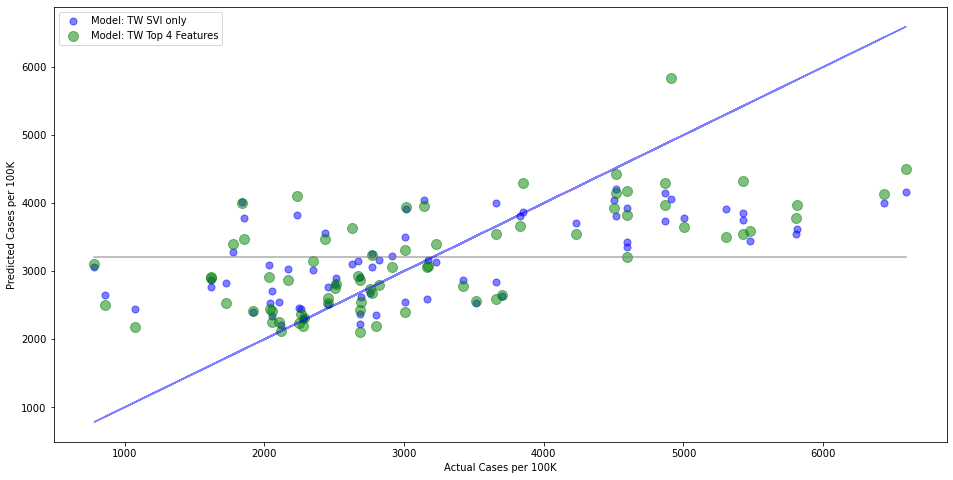

In [34]:
# visualization of actual vs predicted
model_MAE.plot_actual_vs_predicted(visualdf)

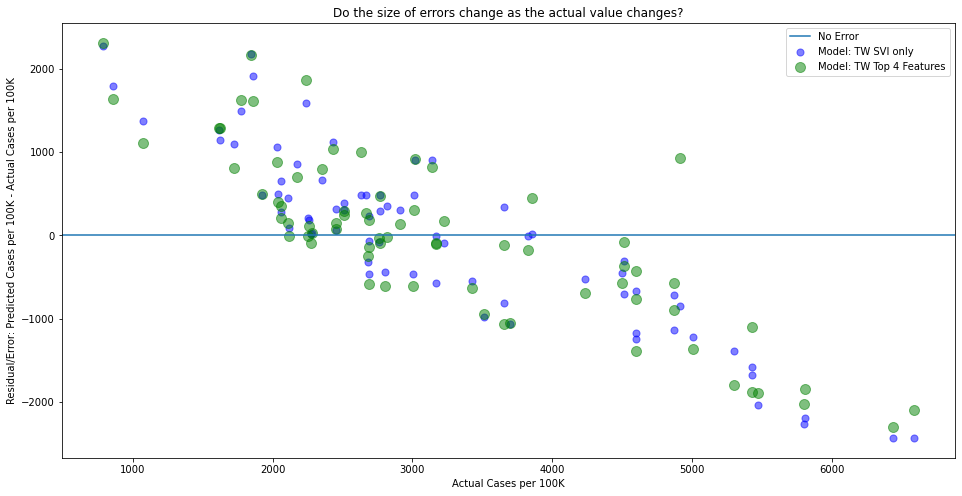

In [35]:
# plotting Errors
model_MAE.plotting_errors(visualdf)

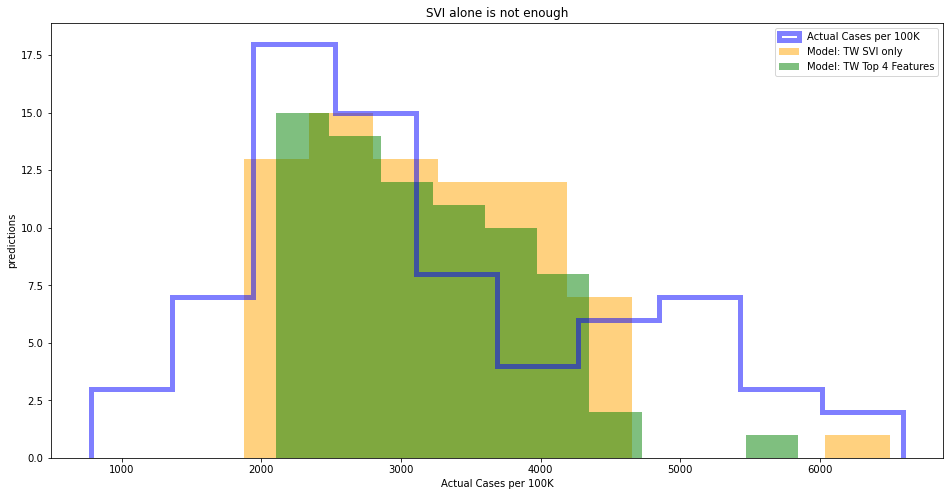

In [36]:

# plotting Histograms
model_MAE.plotting_histograms(visualdf)

In [37]:
# Now this is where I adjust that histogram graphic.

In [75]:
# This function creates a comparison histogram

def plotting_histograms(visualdf):
    '''
    Plots Histograms of top models, currently only shows actual vs best performing
    '''
    plt.figure(figsize=(16,8))
    plt.hist(visualdf.actual, color='blue', alpha=.5, label="Actual Cases per 100K", histtype=u'step', linewidth=5)
#     plt.hist(visualdf.LRpred, color='orange', alpha=.5, label="Model: TW SVI only")
    plt.hist(visualdf.TWpred, color='green', alpha=.5, label="Model: TW Top 4 Features")
    #plt.hist(visualdf.LLpred, color='red', alpha=.5, label="Model: LassoLars")
    plt.xlabel("Cases per 100K", fontsize = 16, fontweight = 'bold')
    plt.ylabel("Frequency", fontsize = 16, fontweight = 'bold')
#     plt.title("SVI alone is not enough")
    plt.ylim(0, 30)
    plt.xlim(-500, 9500)
#     plt.legend()
    plt.show()

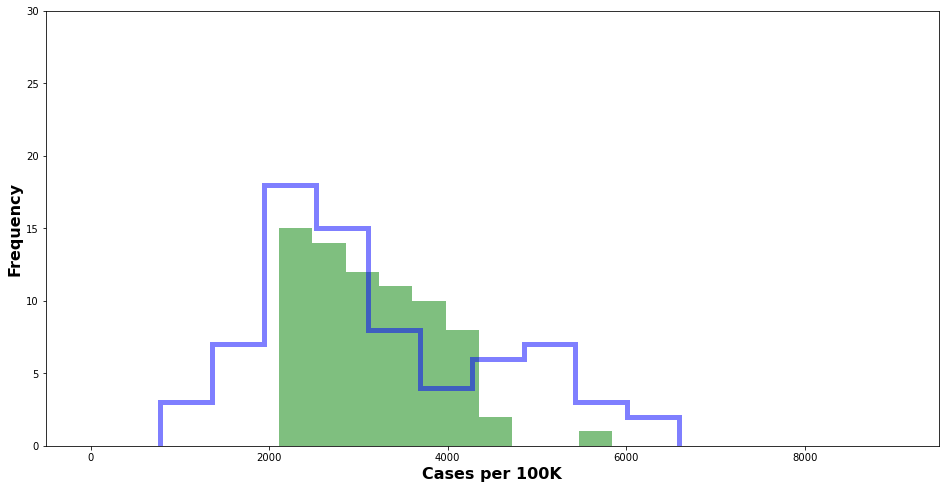

In [76]:
plotting_histograms(visualdf)

In [77]:
# San Antonio SVI total score histograms.

In [78]:
# This function creates a comparison histogram

def plotting_histograms_total_svi(visualdf):
    '''
    Plots Histograms of top models, currently only shows actual vs best performing
    '''
    plt.figure(figsize=(16,8))
    plt.hist(visualdf.actual, color='blue', alpha=.5, label="Actual Cases per 100K", histtype=u'step', linewidth=5)
    plt.hist(visualdf.LRpred, color='orange', alpha=.5, label="Model: TW SVI only")
#     plt.hist(visualdf.TWpred, color='green', alpha=.5, label="Model: TW Top 4 Features")
    #plt.hist(visualdf.LLpred, color='red', alpha=.5, label="Model: LassoLars")
    plt.xlabel("Cases per 100K", fontsize = 16, fontweight = 'bold')
    plt.ylabel("Frequency", fontsize = 16, fontweight = 'bold')
#     plt.title("SVI alone is not enough")
    plt.ylim(0, 30)
    plt.xlim(-500, 9500)
#     plt.legend()
    plt.show()

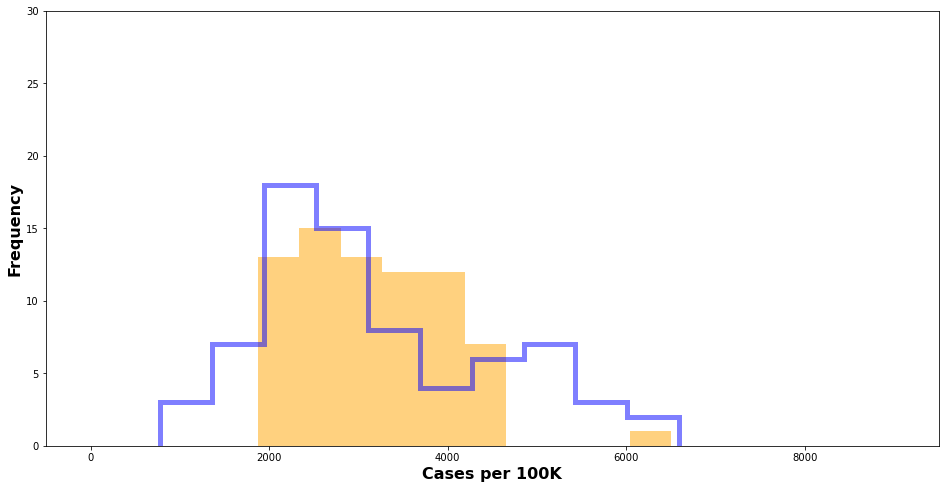

In [79]:
plotting_histograms_total_svi(visualdf)

In [80]:
# This creates the dataframes of predictions so we can visualize the results of our models' predictions

def create_visualdf(y_test, y_train, y_test_predLL, y_test_predLR, y_test_predTW, y_test_predrTW):
    '''
    creates dataframe for making visualizations
    '''
    visualdf = pd.DataFrame()
    visualdf['actual'] = y_test.tract_cases_per_100k
    visualdf['baseline'] = y_train.tract_cases_per_100k.mean()
    visualdf['TWpred'] = y_test_predTW
    visualdf['LRpred'] = y_test_predLR
    visualdf['LLpred'] = y_test_predLL
    visualdf['SVI_only'] = y_test_predrTW
    return visualdf